In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('shape of train dataset:',x_train.shape)
print('shape of test dataset:',x_test.shape)
print('shape of train labels:',y_train.shape)
print('shape of test labels:',y_test.shape)

shape of train dataset: (60000, 28, 28)
shape of test dataset: (10000, 28, 28)
shape of train labels: (60000,)
shape of test labels: (10000,)


Label1: 5
Label2: 0
Label3: 4
Label4: 1
Label5: 9
Label6: 2


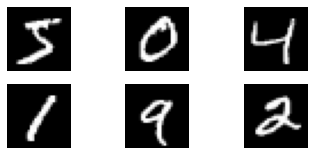

In [4]:
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    print('Label'+str(i+1)+':',y_train[i])
    plt.axis('off')

In [5]:
print('max value:',x_train.max())
print('min value:',x_train.min())

max value: 255
min value: 0


In [6]:
# normalize
x_train=x_train/255.
x_test=x_test/255.

print('max value:',x_train.max())
print('min value:',x_train.min())

max value: 1.0
min value: 0.0


In [7]:
# Reshaping for training
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
total_clusters=len(np.unique(y_test))
print('total_clusters:',total_clusters)

total_clusters: 10


In [9]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [10]:
print('kmeans labels:',kmeans.labels_)
print('length of labels:',len(kmeans.labels_))
print('kmeans clusters:',kmeans.n_clusters)

kmeans labels: [9 1 2 ... 3 7 8]
length of labels: 60000
kmeans clusters: 10


In [11]:
def assigning_label(cluster_labels,y_train):

    #Associating labels to each cluster in KMeans model
    labels = {}

    for i in range(len(np.unique(kmeans.labels_))):

        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        labels[i] = num

    return labels

In [12]:
assigned_labels=assigning_label(kmeans.labels_ ,y_train)
print('Assigned Labels',assigned_labels)
print(len(assigned_labels))

Assigned Labels {0: 1, 1: 0, 2: 4, 3: 9, 4: 1, 5: 2, 6: 7, 7: 6, 8: 8, 9: 3}
10


In [13]:
len(kmeans.labels_)

60000

In [14]:
num_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    num_labels[i] = assigned_labels[kmeans.labels_[i]]

In [15]:
print(len(num_labels))

60000


In [16]:
# Comparing Predicted values and Actual values
print(num_labels[:15].astype('int'))
print(y_train[:15])

[3 0 4 1 9 2 1 3 1 8 3 1 3 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [17]:
(y_train == num_labels).sum()

33479

In [18]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(num_labels,y_train))

Accuracy: 0.5579833333333334


In [19]:
# Function to calculate metrics for the model
def Metrics(model,output):
  
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity : {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cluster_number = [10,16,36,64,144,256]

for i in cluster_number:
    total_clusters = len(np.unique(y_test))
    
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)

    # Fitting the model to training set
    kmeans.fit(X_train)

    # Calculating the metrics
    Metrics(kmeans,y_train)

    # Calculating reference_labels
    reference_labels = assigning_label(kmeans.labels_,y_train)
    #print(reference_labels
    
    # 'number_labels' is a list which denotes the number displayed in image
    num_labels = np.random.rand(len(kmeans.labels_))

    for i in range(len(kmeans.labels_)):
        num_labels[i] = reference_labels[kmeans.labels_[i]]
  
    print('Accuracy score : {}'.format(accuracy_score(num_labels,y_train)))
    print('\n')

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 10
Inertia : 2387485.3172592698
Homogeneity : 0.42596009419158426
Accuracy score : 0.49105




C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 16
Inertia : 2198569.1384166735
Homogeneity : 0.5570376615285751
Accuracy score : 0.6434




C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 36
Inertia : 1958297.9839278022
Homogeneity : 0.6805543301579784
Accuracy score : 0.7574833333333333




C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 64
Inertia : 1797648.3337996188
Homogeneity : 0.7459047941836585
Accuracy score : 0.8194166666666667




C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 144
Inertia : 1624672.6564055935
Homogeneity : 0.8123686587476878
Accuracy score : 0.8776833333333334




C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 256
Inertia : 1505687.0761353108
Homogeneity : 0.8434080654213966
Accuracy score : 0.9019166666666667




In [26]:
# Initialize the K-Means model for 256 clusters
kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set
kmeans.fit(X_test)

# Calculating the metrics
Metrics(kmeans,y_test)

# Calculating the reference_labels
reference_labels = assigning_label(kmeans.labels_,y_test)

# 'number_labels' is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):   
    number_labels[i] = reference_labels[kmeans.labels_[i]]
    
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 256
Inertia : 239895.9743354804
Homogeneity : 0.8643085215298136
Accuracy score : 0.9




In [27]:
# Cluster centroids is stored in 'centroids'
centroids = kmeans.cluster_centers_
print('centroids shape:',centroids.shape)

centroids shape: (256, 784)


In [28]:
centroids = centroids.reshape(256,28,28)
print('min value:',centroids.min())
print('max value:',centroids.max())

min value: 0.0
max value: 1.0


In [29]:
centroids = centroids * 255

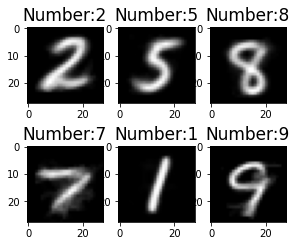

In [31]:
for i in range(6):
    plt.subplots_adjust(0.3)
    plt.subplot(2,3,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i],cmap='gray')